In [231]:
# import the necessary libraries 
from bs4 import BeautifulSoup
import requests
from collections import Counter
from string import punctuation
import operator
import time
import pickle
import re
import pandas as pd

In [3]:
songs_to_search = ['https://lyrics.fandom.com/wiki/Eminem:Lose_Yourself',
 'https://lyrics.fandom.com/wiki/Gnarls_Barkley:Crazy',
 'https://lyrics.fandom.com/wiki/The_Raconteurs:Steady,_As_She_Goes',
 'https://lyrics.fandom.com/wiki/Chamillionaire:Ridin%27']

In [4]:
lyrics_freq = []
for i in songs_to_search:
    time.sleep(5)
    r=requests.get(i)
    soup = BeautifulSoup(r.content)
    text = (''.join(s.findAll(text=True))for s in soup.findAll('div', attrs={'class':'lyricbox'}))
    c = Counter((x.rstrip(punctuation).lower() for y in text for x in y.split()))
    lyrics_freq.append(c.most_common()) 

In [6]:
lyrics_freq

[[('the', 30),
  ('to', 19),
  ('in', 18),
  ('it', 18),
  ('better', 13),
  ('you', 12),
  ('and', 12),
  ('a', 11),
  ('one', 10),
  ('he', 10),
  ('only', 10),
  ('shot', 8),
  ('your', 8),
  ('let', 7),
  ('on', 7),
  ('but', 7),
  ('goes', 7),
  ('own', 7),
  ('get', 7),
  ('do', 7),
  ('opportunity', 7),
  ('i', 7),
  ("he's", 6),
  ('this', 6),
  ('lose', 6),
  ('yourself', 6),
  ('music', 6),
  ('momentyou', 6),
  ('never', 6),
  ('goyou', 6),
  ('not', 6),
  ('miss', 6),
  ('chance', 6),
  ('blowthis', 6),
  ('comes', 6),
  ('once', 6),
  ('is', 6),
  ('da', 6),
  ('my', 6),
  ('his', 5),
  ('so', 5),
  ('up', 5),
  ('that', 5),
  ('no', 5),
  ('or', 4),
  ("don't", 4),
  ('me', 4),
  ('are', 3),
  ('whole', 3),
  ('these', 3),
  ('home', 3),
  ('lifetimeyou', 3),
  ('lifetime', 3),
  ('(you', 3),
  ('for', 3),
  ('all', 3),
  ("it's", 3),
  ('capture', 2),
  ("won't", 2),
  ('out', 2),
  ('back', 2),
  ('knows', 2),
  ('go', 2),
  ('world', 2),
  ('grows', 2),
  ('hoes', 2),


In [21]:
text = soup.findAll('div', attrs={'class':'mw-content-ltr mw-content-text'})

In [56]:
text

[<div class="mw-content-ltr mw-content-text" dir="ltr" id="mw-content-text" lang="en"><h2><span class="mw-headline" id="Rolling_Stone.27s_The_100_Best_Songs_Of_2006"> Rolling Stone's <i>The 100 Best Songs Of 2006</i> </span></h2>
 <ul><li> Full details can be found at <a class="external text" href="http://www.rollingstone.com/news/story/12769472/the_100_best_songs_of_2006">Rolling Stone's</a> website. <br/>
 </li></ul>
 <ol><li> <b><a href="/wiki/Gnarls_Barkley:Crazy" title="Gnarls Barkley:Crazy">Crazy</a></b> by <b><a href="/wiki/Gnarls_Barkley" title="Gnarls Barkley">Gnarls Barkley</a></b>
 </li><li> <b><a href="/wiki/The_Raconteurs:Steady,_As_She_Goes" title="The Raconteurs:Steady, As She Goes">Steady, As She Goes</a></b> by <b><a href="/wiki/The_Raconteurs" title="The Raconteurs">The Raconteurs</a></b>
 </li><li> <b><a href="/wiki/Chamillionaire:Ridin%27" title="Chamillionaire:Ridin'">Ridin'</a></b> by <b><a href="/wiki/Chamillionaire" title="Chamillionaire">Chamillionaire</a></b>


In [69]:
url_part1 = []
for i in text[0].findAll('ol')[0]:
    url_item = 'https://lyrics.fandom.com' + str(i.find('a').get('href'))
    url_part1.append(url_item)

In [71]:
# clean out wiki lyrics page links
url_part1_clean = []
for i in url_part1:
    if 'wiki' in i:
        url_part1_clean.append(i)

In [72]:
url_part1_clean

['https://lyrics.fandom.com/wiki/Gnarls_Barkley:Crazy',
 'https://lyrics.fandom.com/wiki/The_Raconteurs:Steady,_As_She_Goes',
 'https://lyrics.fandom.com/wiki/Chamillionaire:Ridin%27',
 'https://lyrics.fandom.com/wiki/T.I.:What_You_Know',
 'https://lyrics.fandom.com/wiki/The_Pack:Vans',
 'https://lyrics.fandom.com/wiki/Bob_Dylan:Thunder_On_The_Mountain',
 'https://lyrics.fandom.com/wiki/Lily_Allen:Smile',
 'https://lyrics.fandom.com/wiki/Clipse:Wamp_Wamp_(What_It_Do)',
 'https://lyrics.fandom.com/wiki/Wolfmother:Dimension',
 'https://lyrics.fandom.com/wiki/Goldfrapp:Ooh_La_La',
 'https://lyrics.fandom.com/wiki/Pearl_Jam:World_Wide_Suicide',
 'https://lyrics.fandom.com/wiki/The_Killers:Read_My_Mind',
 'https://lyrics.fandom.com/wiki/The_Flaming_Lips:Free_Radicals',
 'https://lyrics.fandom.com/wiki/Cham:Ghetto_Story',
 'https://lyrics.fandom.com/wiki/AFI:Miss_Murder',
 'https://lyrics.fandom.com/wiki/The_Strokes:You_Only_Live_Once',
 'https://lyrics.fandom.com/wiki/My_Chemical_Romance:We

In [75]:
# get frequency of each word in the lyrics page for each song
lyrics_freq = []
for i in url_part1_clean:
    time.sleep(5)
    r=requests.get(i)
    soup = BeautifulSoup(r.content)
    text = (''.join(s.findAll(text=True))for s in soup.findAll('div', attrs={'class':'lyricbox'}))
    c = Counter((x.rstrip(punctuation).lower() for y in text for x in y.split()))
    lyrics_freq.append(c.most_common()) 

In [77]:
len(lyrics_freq)

93

In [79]:
pickle.dump(lyrics_freq, open ('lyrics_freq.p', 'wb'))

In [145]:
# for one playlist, get the titles of each song

r = requests.get("https://open.spotify.com/playlist/37i9dQZF1DX50QitC6Oqtn?si=ciygaK62S76cZEHdfb8P8A")

soup = BeautifulSoup(r.content)

In [153]:
soup

<!DOCTYPE html>
<html class="no-css3-filters no-focus-outline" dir="ltr" lang="en"><head><meta charset="utf-8"/><title>Love Pop on Spotify</title><meta content="Because we all deserve great pop love songs in one playlist." name="description"/><meta content="Love Pop, a playlist by Spotify" property="og:title"/><meta content="Because we all deserve great pop love songs in one playlist." property="og:description"/><meta content="https://open.spotify.com/playlist/37i9dQZF1DX50QitC6Oqtn" property="og:url"/><meta content="https://i.scdn.co/image/ab67706f00000002505e19aaff29a5dc3bc2503c" property="og:image"/><meta content="music.playlist" property="og:type"/><meta content="https://open.spotify.com/user/spotify" property="music:creator"/><meta content="100" property="music:song_count"/><meta content="https://open.spotify.com/track/4evmHXcjt3bTUHD1cvny97" property="music:song"/><meta content="1" property="music:song:track"/><meta content="https://open.spotify.com/track/6GzApXoBQiiAjak3tOQfV3" 

In [93]:
text = soup.findAll('div')

[<div class="background-image-gradient"></div>, <div class="WikiaSiteWrapper">
 <h2>FANDOM</h2>
 <div class="wikia-ad noprint" id="ad-skin"></div>
 <div class="wds-global-navigation-wrapper">
 <div class="wds-global-navigation wds-search-is-always-visible" id="globalNavigation">
 <div class="wds-global-navigation__content-bar-left">
 <a class="wds-global-navigation__logo" data-tracking-label="logo" href="https://www.fandom.com">
 <svg class="wds-global-navigation__logo-image" id="wds-company-logo-fandom-white" viewbox="0 0 164 35" xmlns="http://www.w3.org/2000/svg"><g fill="none" fill-rule="evenodd"><path d="M32.003 16.524c0 .288-.115.564-.32.768L18.3 30.712c-.226.224-.454.324-.738.324-.292 0-.55-.11-.77-.325l-.943-.886a.41.41 0 0 1-.01-.59l15.45-15.46c.262-.263.716-.078.716.29v2.46zm-17.167 10.12l-.766.685a.642.642 0 0 1-.872-.02L3.01 17.362c-.257-.25-.4-.593-.4-.95v-1.858c0-.67.816-1.007 1.298-.536l10.814 10.56c.188.187.505.57.505 1.033 0 .296-.068.715-.39 1.035zM5.73 7.395L9.236 3.9
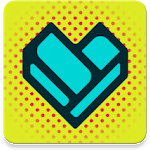
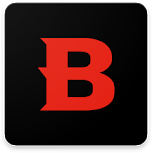
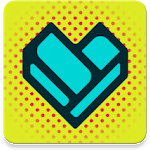
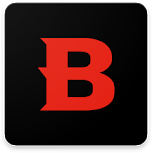
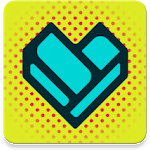
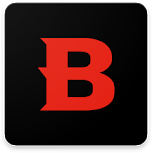

In [94]:
text

In [87]:
# get the lyrics wiki page for each song title
#r = requests.get("https://lyrics.fandom.com/wiki/Special:Search?query=cold+coffee")

#soup = BeautifulSoup(r.content)

In [144]:
#soup

In [ ]:
r = requests.get("https://genius.com/Lauv-and-troye-sivan-im-so-tired-lyrics")
soup = BeautifulSoup(r.content)
breadcrum = soup.find('div', attrs={'class':'lyrics'}).get_text().strip()
breadcrum2 = ''.join(breadcrum)
breadcrum3 = breadcrum2.replace("\n","")

In [181]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [214]:
song_data = pickle.load(open('song_data.p','rb'))

In [216]:
song_data.keys()

dict_keys(['4evmHXcjt3bTUHD1cvny97', '5s4useNfZqXHdXrRdDrzWc', '1HfMVBKM75vxSfsQ5VefZ5', '2wrJq5XKLnmhRXHIAf9xBa', '6mQLN3zRtAp6ovjusyYKrV', '5I8oEqbk2ZBmQfXCrZbUFb', '5WtfUKzXircvW8l5aaVZWT', '5rFj8OzffT0iggSjcBaeND', '22pBf2FVR5WYMcZ1ROSINP', '2jZIfoe48eUeOEnP9Ho4h2', '5g45gvxgaYVuhkDACPnvfh', '2hnxrRNzF74mdDzpQZQukQ', '6b2RcmUt1g9N9mQ3CbjX2Y', '3HVWdVOQ0ZA45FuZGSfvns', '7MmnLaftYzin7boRbplKdA', '6Yx181fZzA0YE2EkUsYruq', '7COXchtUOMd6uIT6HvmRaI', '4JWQC6gyYoPRnxRxk0ta2M', '4vUmTMuQqjdnvlZmAH61Qk', '6moU77g9RQyMzHNuKEaQKq', '1csB4kgdyglOQdH0EyFIqy', '3EPXxR3ImUwfayaurPi3cm', '6Qs4SXO9dwPj5GKvVOv8Ki', '5ug4vqGZ3eisGhY1IsziNX', '2ZrHbO88rM6Ijeg0aJmSzl', '018Idkvf82hi44UZmIXiGB', '5tAa8Uaqr4VvA3693mbIhU', '5FNS5Vj69AhRGJWjhrAd01', '2uaiyLKnYvazyfR0Ky3Kbk', '46D0hYb1B7qiU33VtXt21W', '2RttW7RAu5nOAfq6YFvApB', '4VPXFi4vFTtS9wHe6oMQaT', '7krbSH3rd8lhIZvuzTV3Bl', '0ND8rF8oirMXtE59n585P6', '0TK2YIli7K1leLovkQiNik', '4gJAWJnE5cvAAWyTMTxgdY', '4KnnWpUyPfQD6X5SQSTlH3', '72b0ANL1ZiV71OiZRs0Lny', '

In [217]:
song_data.values()

dict_values([{'artist': 'Ed Sheeran', 'name': 'Beautiful People (feat. Khalid)'}, {'artist': '5 Seconds of Summer', 'name': 'Lie To Me'}, {'artist': 'Selena Gomez', 'name': 'Lose You To Love Me'}, {'artist': 'Dan + Shay', 'name': '10,000 Hours (with Justin Bieber)'}, {'artist': 'James Arthur', 'name': 'Rewrite The Stars (with James Arthur & Anne-Marie)'}, {'artist': 'Shawn Mendes', 'name': "Fallin' All In You"}, {'artist': 'Julia Michaels', 'name': 'What A Time (feat. Niall Horan)'}, {'artist': 'Sam Smith', 'name': 'Fire On Fire - From "Watership Down"'}, {'artist': 'ZAYN', 'name': 'Good Years'}, {'artist': 'Jack & Jack', 'name': 'No One Compares To You'}, {'artist': 'James TW', 'name': 'You & Me'}, {'artist': 'Lauv', 'name': "There's No Way (feat. Julia Michaels)"}, {'artist': 'Sam Smith', 'name': 'How Do You Sleep?'}, {'artist': 'Ed Sheeran', 'name': "I Don't Care (with Justin Bieber)"}, {'artist': 'ZAYN', 'name': 'There You Are'}, {'artist': "Why Don't We", 'name': 'Big Plans'}, {'a

In [219]:
url_genius = []
for i in song_data:
    print(i)
    # artist_name + title must give Lauv-and-troye-sivan-im-so-tired
    artist_name_raw = i['artist']
    print(artist_name_raw)
    #artist_name_raw_case = artist_name_raw.charAt(0) + artist_name_raw.substring(1).toLowerCase();
    #artist_name = artist_name_raw_case.replace(" ","-")
    #song_title_raw = i.get('title')
    #url_genius.append('https://genius.com/'+ artist_name + song_title +'-lyrics')

4evmHXcjt3bTUHD1cvny97


TypeError: string indices must be integers

In [238]:
#song_data = pickle.load(open('37i9dQZF1DXdPec7aLTmlC','rb'))

In [247]:
#song_data = pickle.load(open('7ABD15iASBIpPP5uJ5awvq','rb'))

In [257]:
song_data = pickle.load(open('1Ih75w3gT8Nw3uO4efQHsO','rb'))

In [258]:
url_list = []
for key in list(song_data.keys()):
    song_d = song_data[key]
    current_artist = song_d['artist'].replace(" ","-")
    current_name = song_d['name'].replace(' ','-')
    url_list.append('https://genius.com/{}-{}-lyrics'.format(current_artist,current_name))

In [259]:
len(url_list)

100

In [260]:
#url_part1_clean2 = ['https://genius.com/Clara-mae-us-lyrics']
request_code = []
lyrics_freq2 = []
url_included = []
for i in url_list:
    time.sleep(2)
    r = requests.get(i)
    request_code = r.status_code
    if request_code == 200:
        url_included.append(i)
        soup = BeautifulSoup(r.content)
        breadcrum = soup.find('div', attrs={'class':'lyrics'}).get_text().strip()
        breadcrum2 = ''.join(breadcrum)
        text = breadcrum2.replace("\n"," ")
        #c = Counter((x.rstrip(punctuation).lower() for y in text for x in y.split()))
        c = word_count(re.sub(r'[^\w\s]','',str(text)).lower())
        lyrics_freq2.append(c)

In [261]:
len(lyrics_freq2)

51

In [227]:
url_included = []
for i in url_list:
    time.sleep(5)
    r = requests.get(i)
    request_code = r.status_code
    if request_code == 200:
        url_included.append(i)

In [262]:
len(url_included)

51

In [263]:
playlist_uri = '1Ih75w3gT8Nw3uO4efQHsO'

In [264]:
data_1 = {'url_included': url_included, 'lyrics_frequency': lyrics_freq2, 'playlist_uri': playlist_uri}
data_1_df = pd.DataFrame(data_1)

In [265]:
data_1_df

,url_included,lyrics_frequency,playlist_uri
0,https://genius.com/Waka-Flocka-Flame-Hard-in-D...,"{'producer': 1, 'tag': 1, 'that': 3, 'nigga': ...",1Ih75w3gT8Nw3uO4efQHsO
1,https://genius.com/Chief-Keef-Love-Sosa-lyrics,"{'spoken': 1, 'intro': 1, 'jordan': 1, 'gilty'...",1Ih75w3gT8Nw3uO4efQHsO
2,https://genius.com/ScHoolboy-Q-Man-Of-The-Year...,"{'produced': 1, 'by': 2, 'nez': 1, 'rio': 1, '...",1Ih75w3gT8Nw3uO4efQHsO
3,https://genius.com/Bobby-Shmurda-Bobby-Bitch-l...,"{'produced': 1, 'by': 1, 'dondre': 1, 'intro':...",1Ih75w3gT8Nw3uO4efQHsO
4,https://genius.com/YG-My-Nigga-lyrics,"{'intro': 1, 'mustard': 1, 'on': 7, 'the': 16,...",1Ih75w3gT8Nw3uO4efQHsO
5,https://genius.com/6ix9ine-BILLY-lyrics,"{'intro': 1, 'shotti': 1, '6ix9ine': 4, 'thats...",1Ih75w3gT8Nw3uO4efQHsO
6,https://genius.com/6ix9ine-BUBA-lyrics,"{'intro': 1, 'scum': 1, 'gang': 2, 'mj': 1, 'p...",1Ih75w3gT8Nw3uO4efQHsO
7,https://genius.com/6ix9ine-TATI-lyrics,"{'intro': 1, 'hold': 2, 'up': 7, 'let': 2, 'me...",1Ih75w3gT8Nw3uO4efQHsO
8,https://genius.com/6ix9ine-KOODA-lyrics,"{'intro': 1, 'scum': 2, 'gang': 5, 'chorus': 3...",1Ih75w3gT8Nw3uO4efQHsO
9,https://genius.com/6ix9ine-KEKE-lyrics,"{'intro': 1, '6ix9ine': 4, 'scum': 1, 'gang': ...",1Ih75w3gT8Nw3uO4efQHsO


In [266]:
pickle.dump(data_1_df, open ('data_1Ih75w3gT8Nw3uO4efQHsO_df.p', 'wb'))

In [236]:
uri_to_label = pickle.load(open('uri_to_label.p','rb'))

In [237]:
uri_to_label

{'spotify:playlist:37i9dQZF1DX50QitC6Oqtn': 0,
 'spotify:playlist:37i9dQZF1DX3tuWZaHjp5y': 0,
 'spotify:playlist:37i9dQZF1DX7rOY2tZUw1k': 0,
 'spotify:playlist:37i9dQZF1DX8WMG8VPSOJC': 0,
 'spotify:playlist:5KbTzqKBqxQRD8OBtJTZrS': 0,
 'spotify:playlist:7ABD15iASBIpPP5uJ5awvq': 1,
 'spotify:playlist:37i9dQZF1DWX83CujKHHOn': 1,
 'spotify:playlist:37i9dQZF1DX7qK8ma5wgG1': 1,
 'spotify:playlist:37i9dQZF1DX15JKV0q7shD': 1,
 'spotify:playlist:37i9dQZF1DWVV27DiNWxkR': 1,
 'spotify:playlist:37i9dQZF1DX38EeD6pDm10': 1,
 'spotify:playlist:5s7Sp5OZsw981I2OkQmyrz': 2,
 'spotify:playlist:71Xpaq3Hbpxz6w9yDmIsaH': 2,
 'spotify:playlist:793VjqKUs54BG9h1NB4xVZ': 2,
 'spotify:playlist:4mCGD3C9QXhrWv3uBIpbRF': 2,
 'spotify:playlist:6eKzH5I9hhEiL6mP47HJlw': 2,
 'spotify:playlist:3FgKMEAMkBOscuTQTNJiTN': 2,
 'spotify:playlist:37i9dQZF1DXdPec7aLTmlC': 3,
 'spotify:playlist:37i9dQZF1DWYBO1MoTDhZI': 3,
 'spotify:playlist:37i9dQZF1DWSkMjlBZAZ07': 3,
 'spotify:playlist:37i9dQZF1DX7KNKjOK0o75': 3,
 'spotify:pla

In [156]:
r = requests.get("https://genius.com/Lauv-and-troye-sivan-im-so-tired-lyrics")
#https://genius.com/Shawn-mendes-and-camila-cabello-senorita-lyrics
#https://genius.com/Ed-sheeran-and-justin-bieber-i-dont-care-lyrics
#https://genius.com/Lauv-and-troye-sivan-im-so-tired-lyrics
soup = BeautifulSoup(r.content)

In [157]:
soup

<!DOCTYPE html>
<html class="snarly apple_music_player--enabled bagon_song_page--enabled song_stories_public_launch--enabled react_forums--disabled" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml">
<head>
<base href="//genius.com/" target="_top"/>
<script type="text/javascript">
//<![CDATA[

  var _sf_startpt=(new Date()).getTime();
  if (window.performance && performance.mark) {
    window.performance.mark('parse_start');
  }

//]]>
</script>
<title>Lauv &amp; Troye Sivan – ​i'm so tired... Lyrics | Genius Lyrics</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="app-id=709482991" name="apple-itunes-app"/>
<link href="https://assets.genius.com/images/apple-touch-icon.png?1573748323" rel="apple-touch-icon"/>
<link href="https://assets.genius.com/images/apple-touch-icon.png?1573748323" rel="apple-touch-icon"/>
<!-- Mobile

In [158]:
breadcrum = soup.find('div', attrs={'class':'lyrics'}).get_text().strip()

In [159]:
#breadcrum = [item.rstrip('\n') for item in breadcrum if str(item)]

In [160]:
breadcrum2 = ''.join(breadcrum)

In [161]:
breadcrum3 = breadcrum2.replace("\n","")

In [162]:
breadcrum3

"[Chorus: Lauv]I'm so tired of love songs, tired of love songsTired of love songs, tired of loveJust wanna go home, wanna go homeWanna go home, whoaSo tired of love songs, tired of love songsTired of love songs, tired of loveJust wanna go home, wanna go homeWanna go home, whoa[Verse 1: Lauv]Party, trying my best to meet somebodyBut everybody around me is falling in love to our songI, I, oh I, yeahHate it, taking a shot 'cause I can't take itBut I don't think that they make anything that strong, so I hold onI, I, oh I, yeah[Chorus: Lauv]I'm so tired of love songs, tired of love songsTired of love songs, tired of loveJust wanna go home, wanna go homeWanna go home, whoaSo tired of love songs, tired of love songsTired of love songs, tired of loveJust wanna go home, wanna go homeWanna go home, whoa[Verse 2: Troye Sivan]Strangers, killing my lonely nights with strangersAnd when they leave, I go back to our song, I hold onI, I, oh IHurts like heaven, lost in the soundBuzz cut season like you'

In [36]:
ol_list = []
for i in text:
    soup.find('div', attrs={'class':'mw-content-ltr mw-content-text'})
    ol_list.append(i.find('ol').find('a').attrs['href'])

In [38]:
len(text)

1

In [37]:
ol_list

['/wiki/Gnarls_Barkley:Crazy']

In [31]:
url_href = []
for j in ol_list:
    url_href.append(j.findAll('a').attrs['href'])

In [35]:
type(j)

bs4.element.Tag

In [33]:
ol_list.findAll('a').attrs['href']

AttributeError: 'list' object has no attribute 'findAll'

In [7]:
r = requests.get("https://lyrics.fandom.com/wiki/LyricWiki:Lists/2006/Songs/Rolling_Stone")

soup = BeautifulSoup(r.content)

<!DOCTYPE html>
<html class="" dir="ltr" lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, user-scalable=yes" name="viewport"/>
<meta content="MediaWiki 1.19.24" name="generator"/>
<meta content="LyricWiki,lyricwiki,LyricWiki:Lists/2006/Songs/Rolling Stone,Gnarls Barkley:Crazy,Chamillionaire,Bob Dylan,Lily Allen:Smile,Lily Allen,Clipse,Goldfrapp:Ooh La La,Goldfrapp,Pearl Jam,The Killers" name="keywords"/>
<meta content="Full details can be found at Rolling Stone's website. Crazy by Gnarls Barkley Steady, As She Goes by The Raconteurs Ridin' by Chamillionaire What You Know by T.I. Vans by The Pack Thunder On The Mountain by Bob Dylan Smile by Lily Allen Wamp Wamp (What It Do) by Clipse Dimension by Wolfmother..." name="description"/>
<meta content="summary" name="twitter:card"/>
<meta content="@getfandom" name="twitter:site"/>
<meta content="https://lyrics.fandom.com/wiki/LyricWiki:Lists/2006/Songs/Rolling_Stone" na
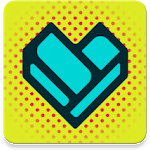
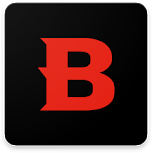

In [8]:
soup

In [12]:
text = (soup.find('a').attrs['href'])



In [13]:
text

'https://www.fandom.com'

In [73]:
r = requests.get("https://lyrics.fandom.com/wiki/Eminem:Lose_Yourself")

soup = BeautifulSoup(r.content)

In [74]:
text = (''.join(s.findAll(text=True))for s in soup.findAll('div', attrs={'class':'lyricbox'}))

c = Counter((x.rstrip(punctuation).lower() for y in text for x in y.split()))
print (c.most_common()) # prints most common words staring at most common.

[('the', 30), ('to', 19), ('in', 18), ('it', 18), ('better', 13), ('you', 12), ('and', 12), ('a', 11), ('one', 10), ('he', 10), ('only', 10), ('shot', 8), ('your', 8), ('let', 7), ('on', 7), ('but', 7), ('goes', 7), ('own', 7), ('get', 7), ('do', 7), ('opportunity', 7), ('i', 7), ("he's", 6), ('this', 6), ('lose', 6), ('yourself', 6), ('music', 6), ('momentyou', 6), ('never', 6), ('goyou', 6), ('not', 6), ('miss', 6), ('chance', 6), ('blowthis', 6), ('comes', 6), ('once', 6), ('is', 6), ('da', 6), ('my', 6), ('his', 5), ('so', 5), ('up', 5), ('that', 5), ('no', 5), ('or', 4), ("don't", 4), ('me', 4), ('are', 3), ('whole', 3), ('these', 3), ('home', 3), ('lifetimeyou', 3), ('lifetime', 3), ('(you', 3), ('for', 3), ('all', 3), ("it's", 3), ('capture', 2), ("won't", 2), ('out', 2), ('back', 2), ('knows', 2), ('go', 2), ('world', 2), ('grows', 2), ('hoes', 2), ('him', 2), ('coast', 2), ('nose', 2), ("'cause", 2), ('here', 2), ('cold', 2), ('next', 2), ('old', 2), ('dum', 2), ('motherfuckin

In [140]:
labels_loving = ['love', 'heart', 'her', 'his', 'boy', 'girl', 'want', 'life', 'best', 'care', 'hope', 'only', 'forever', 'embrace', 'kiss']
dict_you_want = { your_key: c[your_key] for your_key in labels_sad }
print(dict_you_want)
max(dict_you_want, key=dict_you_want.get)

{'break': 0, 'broken': 0, 'fuck': 0, 'miss': 6, 'missing': 0, 'heart': 0, 'sad': 0, 'cry': 0, 'crying': 0, 'rain': 0, 'alone': 0, 'wish': 0, 'hate': 0, 'lose': 6}


'miss'

In [141]:
labels_test = ['the']
dict_you_want = { your_key: c[your_key] for your_key in labels_test }
print(dict_you_want)
max(dict_you_want, key=dict_you_want.get)

{'the': 30}


'the'

In [142]:
labels_sad = ['break', 'broken', 'fuck', 'miss', 'missing', 'heart', 'sad', 'cry', 'crying', 'rain', 'alone', 'wish', 'hate', 'lose']
dict_you_want = { your_key: c[your_key] for your_key in labels_sad }
print(dict_you_want)
max(dict_you_want, key=dict_you_want.get)

{'break': 0, 'broken': 0, 'fuck': 0, 'miss': 6, 'missing': 0, 'heart': 0, 'sad': 0, 'cry': 0, 'crying': 0, 'rain': 0, 'alone': 0, 'wish': 0, 'hate': 0, 'lose': 6}


'miss'

In [144]:
r2 = requests.get("https://www.azlyrics.com/lyrics/eminem/loseyourself.html")

soup2 = BeautifulSoup(r2.content)

In [151]:
text = (''.join(s.findAll(text=True))for s in soup2.findAll('div', attrs={'class':'lyricsh'}))

c = Counter((x.rstrip(punctuation).lower() for y in text for x in y.split()))
print (c.most_common()) # prints most common words staring at most common.2

[('eminem', 1), ('lyrics', 1)]


In [146]:
text2

<generator object <genexpr> at 0x113c57c50>

In [147]:
soup2

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content='Eminem "Lose Yourself": Look, if you had one shot, or one opportunity To seize everything you ever wanted, in one moment Wou...' name="description"/>
<meta content="Lose Yourself lyrics, Eminem Lose Yourself lyrics, Eminem lyrics" name="keywords"/>
<meta content="noarchive" name="robots"/>
<meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>
<title>Eminem - Lose Yourself Lyrics | AZLyrics.com</title>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
<link href="//www.azlyrics.com/bsaz.css?1" rel="stylesheet"/>
<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
<script src="https://oss